#

## Données bancaires et transactions des clients

### Source et structure de données :
- SRC :  https://www.kaggle.com/datasets/yogeshtekawade/banking-and-customer-transaction-data
    - HDFC Bank
    - customer_data.csv - données démographiques et profils client
    - transaction_data.csv - historique des transactions et investissements
    - bank_data.csv - performance financière des agences bancaires données synthétiques mais réalistes, avec du bruit et des valeurs manquantes pour simuler un environnement réel

## Chargement des données
## Nettoyage des données
    Pour garantir la fiabilité du modèle. L’encodage par one-hot permet de transformer les variables qualitatives en une forme compréhensible pour les algorithmes d’apprentissage supervisé, tout en évitant le piège de la variable dummy trap (drop_first=True).
## Séparation des variables
## Entraînement du modèle de l'Arbre de décision (Decision Tree)
Division des données en jeu d’entraînement et de test (70/30). On limite la profondeur de l’arbre à 3 pour éviter l’overfitting.
## Visualisation avec dtreeviz 
La bibliothèque dtreeviz offre une visualisation élégante et explicite de l’arbre de décision avec les splits, les proportions et les classes.  essentielle pour les parties prenantes non techniques. L’outil permet une interprétation intuitive du modèle en metttant en lumière les facteurs clés influençant la décision, ce qui facilite l’analyse métier.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

c:\Users\Admin\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#Fusion des fichiers via les clés primaires Customer_ID et Branch_ID
#Cible : prédire le type d’investissement
#Entrainement d'un modèle de classification Random Forest et Arbre de décision
#Visualisation avec dtreeviz pour interpréter les décisions

In [31]:
import dtreeviz
import graphviz

In [4]:
directory_path = r'C:\Users\Admin\Desktop\BankingMLProject\data'
bank_filename = 'bank_data_cleaned.csv'
customer_filename = 'customer_data_cleaned.csv'
transactions_filename = 'transaction_data_cleaned.csv'

In [6]:
# Création du fichier fusioned_data.csv
# Chargement des fichiers CSV
clients = pd.read_csv(os.path.join(directory_path, customer_filename))
transactions = pd.read_csv(os.path.join(directory_path,transactions_filename))
banques = pd.read_csv(os.path.join(directory_path,bank_filename))

# Aperçu rapide
print(clients.shape, transactions.shape, banques.shape)

(10000, 7) (10000, 8) (1000, 6)


In [7]:
print(clients.columns, transactions.columns, banques.columns)

Index(['Customer_ID', 'Age', 'Customer_Type', 'City', 'Region', 'Bank_Name',
       'Branch_ID'],
      dtype='object') Index(['Transaction_ID', 'Customer_ID', 'Account_Type', 'Total_Balance',
       'Transaction_Amount', 'Investment_Amount', 'Investment_Type',
       'Transaction_Date'],
      dtype='object') Index(['Branch_ID', 'City', 'Region', 'Firm_Revenue', 'Expenses',
       'Profit_Margin'],
      dtype='object')


In [22]:
# Fusion client + transactions
df = pd.merge(transactions, clients, on='Customer_ID', how='right')

# Fusion avec données bancaires via la ville et la région
df = pd.merge(df, banques, on=['Branch_ID','City', 'Region'], how='left')

# Vérification
df.head()

,Transaction_ID,Customer_ID,Account_Type,Total_Balance,Transaction_Amount,Investment_Amount,Investment_Type,Transaction_Date,Age,Customer_Type,City,Region,Bank_Name,Branch_ID,Firm_Revenue,Expenses,Profit_Margin
0,302143.0,200000,Current,53364.0,2426.00000,11595.0,Fixed Deposit,2023-10-11,56.0,Employee,Pune,North,HDFC Bank,1350,NaN,NaN,NaN
1,307114.0,200000,Business,10698.0,2428.00000,9783.0,Fixed Deposit,2024-08-30,56.0,Employee,Pune,North,HDFC Bank,1350,NaN,NaN,NaN
2,301850.0,200001,Savings,96731.0,6491.08681,1411.0,Recurring Deposit,2023-07-14,69.0,NaN,Kolhapur,East,HDFC Bank,1648,NaN,NaN,NaN
3,304462.0,200001,Business,44704.0,2506.00000,26519.0,Mutual Fund,2023-07-17,69.0,NaN,Kolhapur,East,HDFC Bank,1648,NaN,NaN,NaN
4,NaN,200002,NaN,NaN,NaN,NaN,NaN,NaN,46.0,Business,Pune,West,HDFC Bank,1798,NaN,NaN,NaN


In [23]:
# Sauvegarde du dossier 'cleaned_data'
output_directory = r"C:\Users\Admin\Desktop\BankingMLProject\data"

# Nom du fichier CSV de sortie
output_filename = "data_cleaned.csv"

# Création du chemin complet du fichier de sortie
output_filepath = os.path.join(output_directory, output_filename)

#Sauvegarder du DataFrame nettoyé en CSV
try:
    # index=False pour ne pas écrire l'index du DataFrame comme une colonne dans le CSV
    df.to_csv(output_filepath, index=False)
    print(f"\nDataFrame nettoyé sauvegardé avec succès dans : {output_filepath}")
except Exception as e:
    print(f"\nUne erreur est survenue lors de la sauvegarde : {e}")


DataFrame nettoyé sauvegardé avec succès dans : C:\Users\Admin\Desktop\BankingMLProject\data\data_cleaned.csv


    #les transactions aux clients via Customer_ID, puis on enrichit avec les données bancaires en croisant City et Region.
 #Fusion des fichiers pour créer une vue holistique du comportement client, en intégrant les facteurs individuels et contextuels (performance régionale)

In [12]:
fusioned_filename = 'data_cleaned.csv'

In [13]:
# Chargement du fichier
df = pd.read_csv(os.path.join(directory_path,transactions_filename))

In [14]:
# Affichage des 5 premières lignes pour inspection
df.head()

,Transaction_ID,Customer_ID,Account_Type,Total_Balance,Transaction_Amount,Investment_Amount,Investment_Type,Transaction_Date
0,300000,209689,Business,69339,4794.0,42580,Fixed Deposit,2024-12-08
1,300001,206124,Business,12825,3500.0,46605,Fixed Deposit,2022-09-09
2,300002,207501,Current,67753,2401.0,17027,Fixed Deposit,2022-04-28
3,300003,208675,Savings,67061,2952.0,3054,Fixed Deposit,2023-05-22
4,300004,204923,Business,8566,1025.0,44937,Fixed Deposit,2023-04-05


In [24]:
print(df.columns)

Index(['Transaction_ID', 'Customer_ID', 'Account_Type', 'Total_Balance',
       'Transaction_Amount', 'Investment_Amount', 'Investment_Type',
       'Transaction_Date', 'Age', 'Customer_Type', 'City', 'Region',
       'Bank_Name', 'Branch_ID', 'Firm_Revenue', 'Expenses', 'Profit_Margin'],
      dtype='object')


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13665 entries, 0 to 13664
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_ID      10000 non-null  float64
 1   Customer_ID         13665 non-null  int64  
 2   Account_Type        10000 non-null  object 
 3   Total_Balance       10000 non-null  float64
 4   Transaction_Amount  10000 non-null  float64
 5   Investment_Amount   10000 non-null  float64
 6   Investment_Type     10000 non-null  object 
 7   Transaction_Date    10000 non-null  object 
 8   Age                 12982 non-null  float64
 9   Customer_Type       12982 non-null  object 
 10  City                12996 non-null  object 
 11  Region              13665 non-null  object 
 12  Bank_Name           13665 non-null  object 
 13  Branch_ID           13665 non-null  int64  
 14  Firm_Revenue        516 non-null    float64
 15  Expenses            551 non-null    float64
 16  Prof

In [26]:
df.describe()

,Transaction_ID,Customer_ID,Total_Balance,Transaction_Amount,Investment_Amount,Age,Branch_ID,Firm_Revenue,Expenses,Profit_Margin
count,10000.00000,13665.000000,10000.000000,10000.000000,10000.000000,12982.000000,13665.000000,516.000000,551.000000,551.000000
mean,304999.50000,205016.749433,50221.505800,2542.708056,25550.248400,48.899399,1497.923235,475000.562016,265863.210526,23.168657
std,2886.89568,2892.132240,28540.392011,1432.677420,14108.052078,18.012413,289.650966,268171.147271,143904.068760,43.021987
min,300000.00000,200000.000000,1003.000000,51.613952,1001.000000,18.000000,1000.000000,51903.000000,20654.000000,-49.500000
25%,302499.75000,202512.000000,25132.000000,1310.000000,13381.000000,33.000000,1244.000000,236731.750000,140565.000000,-13.275000
50%,304999.50000,205029.000000,50326.000000,2538.500000,25708.500000,49.000000,1499.000000,462175.500000,266335.000000,23.260000
75%,307499.25000,207528.000000,74914.500000,3746.250000,37731.000000,65.000000,1748.000000,718295.250000,403009.000000,61.265000
max,309999.00000,209999.000000,99993.000000,7046.296441,49998.000000,79.000000,1999.000000,995836.000000,499568.000000,98.880000


In [27]:
df.nunique()

Transaction_ID        10000
Customer_ID           10000
Account_Type              3
Total_Balance          9517
Transaction_Amount     4657
Investment_Amount      9029
Investment_Type           3
Transaction_Date       1096
Age                      62
Customer_Type             3
City                      6
Region                    4
Bank_Name                 1
Branch_ID              1000
Firm_Revenue            311
Expenses                329
Profit_Margin           327
dtype: int64

## Nettoyage des données

In [28]:
# Vérification des valeurs manquantes
df.isnull().sum()

Transaction_ID         3665
Customer_ID               0
Account_Type           3665
Total_Balance          3665
Transaction_Amount     3665
Investment_Amount      3665
Investment_Type        3665
Transaction_Date       3665
Age                     683
Customer_Type           683
City                    669
Region                    0
Bank_Name                 0
Branch_ID                 0
Firm_Revenue          13149
Expenses              13114
Profit_Margin         13114
dtype: int64

In [ ]:
missing_values = df.isnull().sum()
percentage_missing_values = (missing_values / len(df)) * 100
print(percentage_missing_values)

In [ ]:
total_missing_values = df.isnull().sum().sum()
print(total_missing_values)

In [ ]:
total_cells = df.shape[0] * df.shape[1]
print(total_cells)

In [ ]:
total_missing_percentage = (total_missing_values / total_cells) * 100
print(total_missing_percentage)

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='Age')

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='Investment_Amount')

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='Customer_Type')

In [ ]:
# Création d'une copie pour réaliser l'affectation de la moyenne
df_imputed_mean = df.copy()

In [ ]:
df_imputed_mean['Age'].fillna(df_imputed_mean['Age'].mean(), inplace=True)

In [ ]:
df = df_imputed_mean.copy()

In [ ]:
# Vérification des doublons
df.duplicated()

df.drop_duplicates(inplace=True)
print()

0        False
1        False
2        False
3        False
4        False
         ...  
13660    False
13661    False
13662    False
13663    False
13664    False
Length: 13665, dtype: bool

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

In [34]:

# Encodage des variables catégorielles
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.info()
#Le nettoyage garantit la qualité du modèle. L’encodage permet une exploitation optimale des variables qualitatives sans introduire de redondance dans l'entrainement et les rendre compatibles avec les algorithmes ML

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13665 entries, 0 to 13664
Columns: 1119 entries, Transaction_ID to Region_West
dtypes: bool(1109), float64(8), int64(2)
memory usage: 15.5 MB


In [35]:
print(df_encoded.columns.tolist())

['Transaction_ID', 'Customer_ID', 'Total_Balance', 'Transaction_Amount', 'Investment_Amount', 'Age', 'Branch_ID', 'Firm_Revenue', 'Expenses', 'Profit_Margin', 'Account_Type_Current', 'Account_Type_Savings', 'Investment_Type_Mutual Fund', 'Investment_Type_Recurring Deposit', 'Transaction_Date_2022-03-22', 'Transaction_Date_2022-03-23', 'Transaction_Date_2022-03-24', 'Transaction_Date_2022-03-25', 'Transaction_Date_2022-03-26', 'Transaction_Date_2022-03-27', 'Transaction_Date_2022-03-28', 'Transaction_Date_2022-03-29', 'Transaction_Date_2022-03-30', 'Transaction_Date_2022-03-31', 'Transaction_Date_2022-04-01', 'Transaction_Date_2022-04-02', 'Transaction_Date_2022-04-03', 'Transaction_Date_2022-04-04', 'Transaction_Date_2022-04-05', 'Transaction_Date_2022-04-06', 'Transaction_Date_2022-04-07', 'Transaction_Date_2022-04-08', 'Transaction_Date_2022-04-09', 'Transaction_Date_2022-04-10', 'Transaction_Date_2022-04-11', 'Transaction_Date_2022-04-12', 'Transaction_Date_2022-04-13', 'Transaction

In [ ]:
# Suppression des colonnes inutiles
df.drop(['Transaction_ID','Bank_Name', 'Branch_ID'], axis=1, inplace=True)

In [ ]:
# Encodage one-hot
#df_encoded = pd.get_dummies(df, columns=['Account_Type', 'Investment_Type', 'Customer_Type', 'Region', 'City'], drop_first=True) #drop_first=true permet d'éviter le piège des variables fictives
#éviter la redondance en supprimant une des catégories (utile pour les modèles linéaires)
#Cette méthode permet de transformer chaque catégorie en une série de variables binaires, évitant ainsi les erreurs de type ValueError: could not convert string to float.

In [38]:
# Transposer le DataFrame pour comparer les colonnes comme des lignes
transposed = df_encoded.T

In [39]:
# Identifier les colonnes dupliquées (même contenu)
duplicate_columns = transposed.duplicated(keep='first')

In [40]:
# Afficher les colonnes dupliquées
dups = transposed[duplicate_columns].index.tolist()
print("Colonnes dupliquées :", dups)

Colonnes dupliquées : []


In [43]:
# Exemple : vérifier les valeurs uniques dans les colonnes encodées
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'uint8':  # typique des colonnes One-Hot
        uniques = df_encoded[col].unique()
        if set(uniques) - {0, 1}:
            print(f"Incohérence dans la colonne {col} : {uniques}")

In [48]:
df.drop(['Transaction_ID'], axis=1, inplace=True)

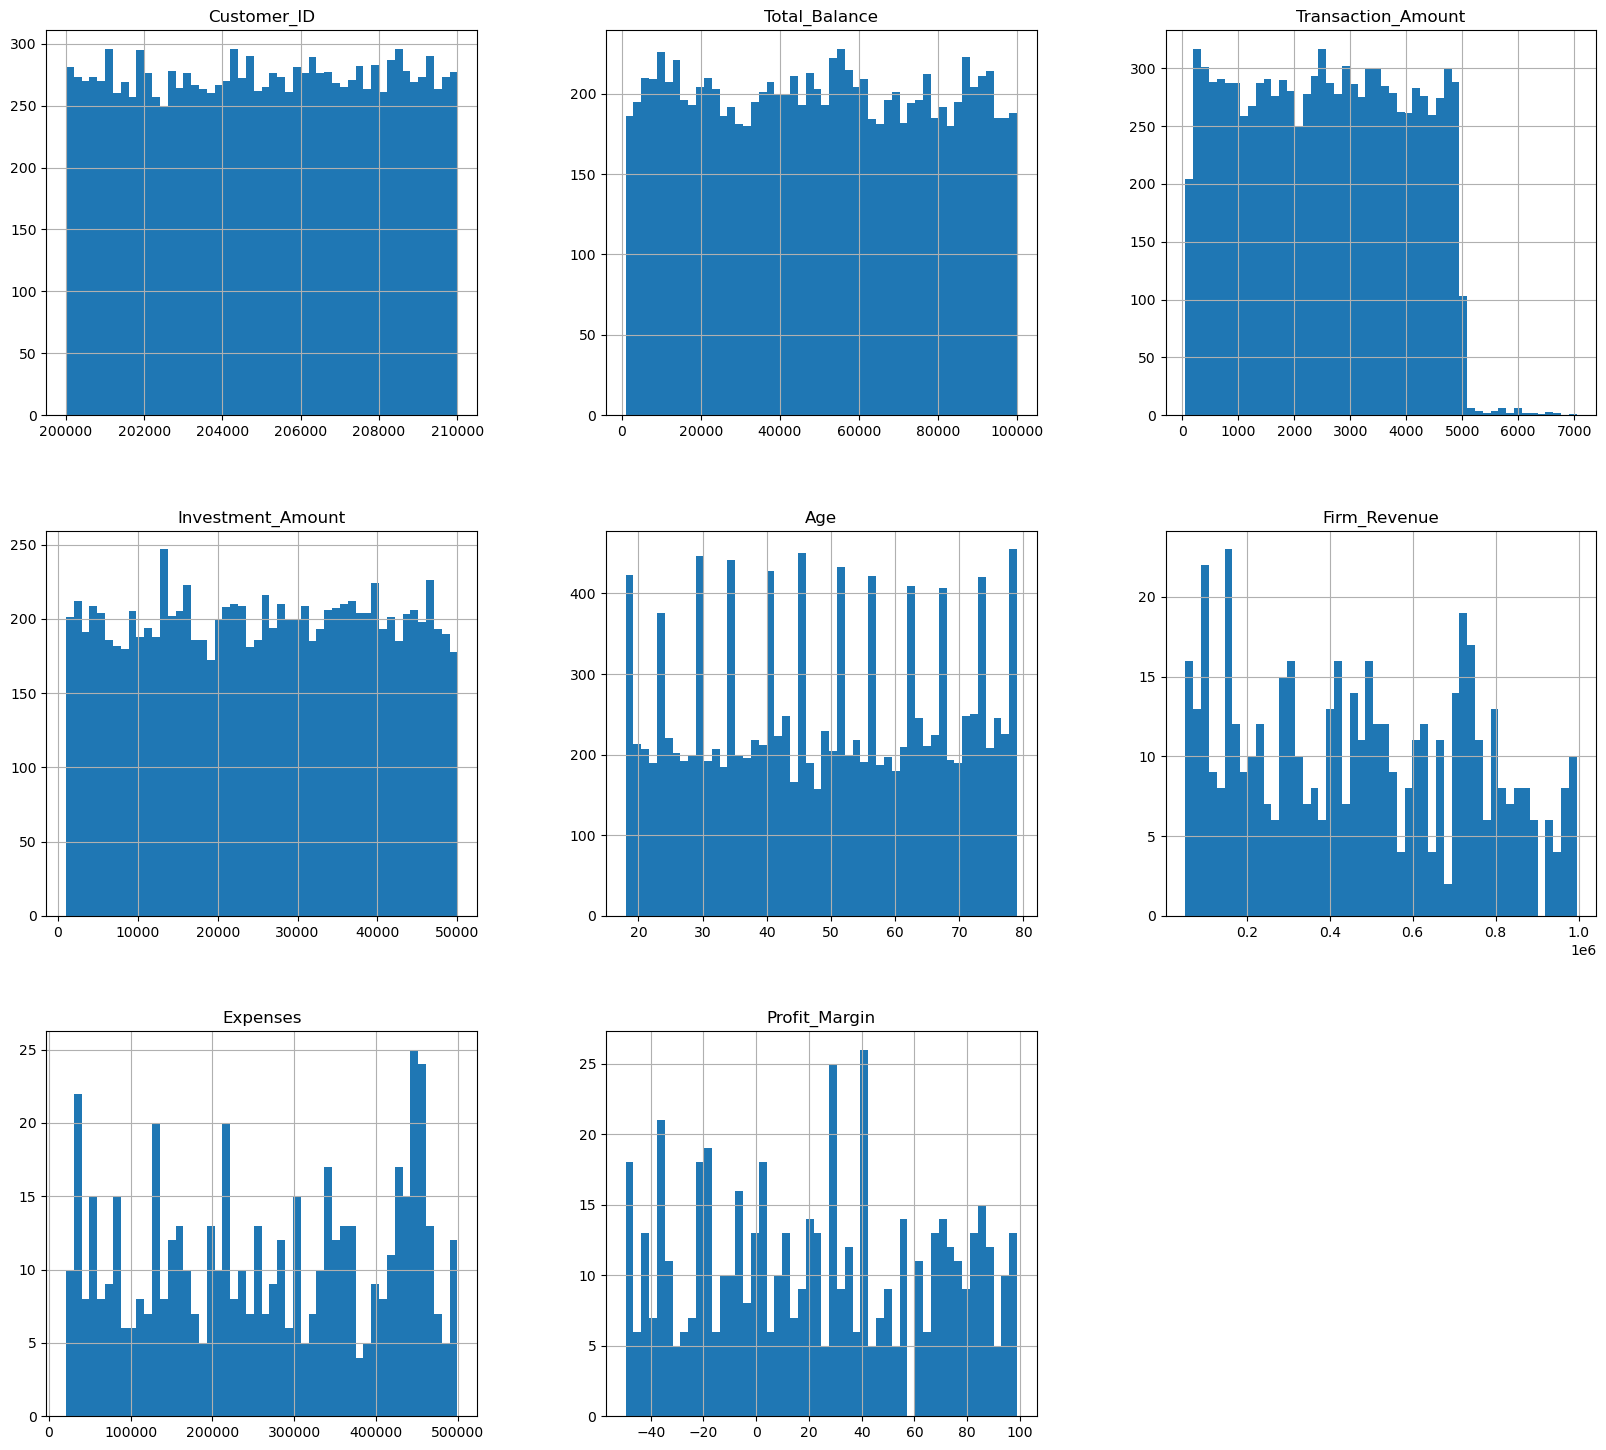

In [49]:
df.hist(bins= 50,figsize=(20,18));

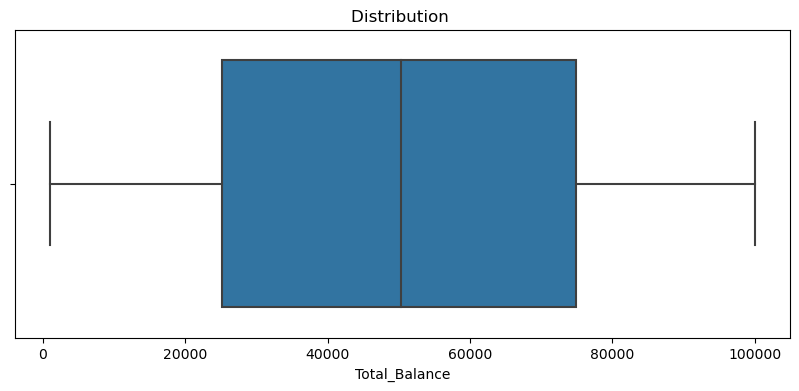

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Total_Balance'])
plt.title("Distribution du solde")
plt.show()

Calculs: mise en avant du volume d’investissement par banque, de la segmentation des clients, de laperformance régionale

#Création d'une variable binaire pour prédire si un client choisit un dépôt à terme.

## Séparation des variables

##Variable cible


#On sépare les variables indépendantes (X) de la variable dépendante (y), ici le churn du client.
#séparation permet de structurer les données pour l’entraînement du modèle. Le choix de la variable cible dépend du problème métier — ici, anticiper le départ des clients représente un enjeu stratégique.

In [55]:
print(df)

       Customer_ID Account_Type  Total_Balance  Transaction_Amount  \
0           200000      Current        53364.0          2426.00000   
1           200000     Business        10698.0          2428.00000   
2           200001      Savings        96731.0          6491.08681   
3           200001     Business        44704.0          2506.00000   
4           200002          NaN            NaN                 NaN   
...            ...          ...            ...                 ...   
13660       209996     Business        27914.0          3201.00000   
13661       209997          NaN            NaN                 NaN   
13662       209998      Savings        43649.0          3982.00000   
13663       209998      Savings        48572.0          3315.00000   
13664       209999     Business        27136.0          1955.00000   

       Investment_Amount    Investment_Type Transaction_Date   Age  \
0                11595.0      Fixed Deposit       2023-10-11  56.0   
1                 9

In [58]:
print(df.dtypes.value_counts())

float64    7
object     6
int64      1
Name: count, dtype: int64


In [59]:
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Colonnes non numériques :", non_numeric_cols.tolist())
print(df.dtypes.value_counts())

Colonnes non numériques : ['Account_Type', 'Investment_Type', 'Transaction_Date', 'Customer_Type', 'City', 'Region']
float64    7
object     6
int64      1
Name: count, dtype: int64


In [ ]:
#df = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True)

In [61]:
#prédire le type d'investissement
target = 'Investment_Type' ##anticiper les préférences d’investissement pour personnaliser l’offre. Fixed Deposit

X = df.drop(target, axis=1)
y = df[target]


# Variables explicatives
X = df.drop(target, axis=1)
y = df[target]

KeyError: "['Investment_Type'] not found in axis"

# Entraînement du modèle de l'Arbre de décision (Decision Tree)

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Séparation en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Création du modèle
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
#ax_depth=3 permet de rendre l’arbre plus lisible tout en réduisant le risque de surapprentissage. La séparation des données assure une évaluation plus réaliste des performances du modèle. Ce modele est idéal pour une première preuve de concept

ValueError: could not convert string to float: 'Savings'

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prédictions
y_pred = clf.predict(X_test)

# Métriques
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
#On évalue le modèle avec des métriques classiques : précision, matrice de confusion, F1-score

# Visualisation avec dtreeviz 

In [ ]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(clf, 
               X_train, 
               y_train, 
               target_name="Customer Churn", 
               feature_names=X_train.columns, 
               class_names=["No Churn", "Churn"])

viz.view()


puis liste un plan detaille avec des points precis pour la creation des slides pour finaliser livrable GitHub.